In [2]:
!pip install faker

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 23.7 MB/s eta 0:00:00


In [4]:
import pandas as pd
import random
from faker import Faker
import numpy as np

# Setup
fake = Faker()
random.seed(42)
np.random.seed(42)

# Constants
NUM_ROWS = 5000
store_regions = ["North", "South", "East", "West"]
product_categories = {
    "Electronics": ["Smartphone", "Laptop", "Tablet"],
    "Home Appliances": ["Refrigerator", "Washing Machine", "Microwave"],
    "Clothing": ["Jeans", "T-Shirt", "Jacket"],
    "Groceries": ["Rice", "Wheat", "Sugar"]
}
genders = ["Male", "Female", "Other"]

# Generate data
data = []
for _ in range(NUM_ROWS):
    category = random.choice(list(product_categories.keys()))
    product = random.choice(product_categories[category])
    unit_price = round(random.uniform(100, 50000), 2)
    units_sold = random.randint(1, 10)
    revenue = round(unit_price * units_sold, 2)

    row = {
        "Date": fake.date_between(start_date="-1y", end_date="today"),
        "StoreID": f"STR{random.randint(1, 20):03}",
        "StoreRegion": random.choice(store_regions),
        "Product": product,
        "Category": category,
        "UnitsSold": units_sold,
        "UnitPrice": unit_price,
        "Revenue": revenue,
        "CustomerAge": random.randint(18, 65),
        "Gender": random.choice(genders)
    }
    data.append(row)

# Convert to DataFrame
df = pd.DataFrame(data)

# Show first 5 rows
print("Sample data:")
print(df.head())

# Save to CSV (you'll download this later for Power BI or SQL)
df.to_csv("retail_sales_data.csv", index=False)
print("\nCSV file saved as 'retail_sales_data.csv'")


Sample data:
         Date StoreID StoreRegion          Product         Category  \
0  2024-10-07  STR008       South       Smartphone      Electronics   
1  2025-06-10  STR003       South           Tablet      Electronics   
2  2024-07-29  STR014       South           Tablet      Electronics   
3  2025-05-06  STR014        East            Jeans         Clothing   
4  2025-03-24  STR004        East  Washing Machine  Home Appliances   

   UnitsSold  UnitPrice    Revenue  CustomerAge Gender  
0          4   37103.37  148413.48           65   Male  
1          1   21153.90   21153.90           32  Other  
2          9   10022.00   90198.00           46  Other  
3          3   37964.49  113893.47           35   Male  
4          7    5200.29   36402.03           40  Other  

CSV file saved as 'retail_sales_data.csv'


Shape of dataset: (5000, 10)

Column Data Types:
 Date            object
StoreID         object
StoreRegion     object
Product         object
Category        object
UnitsSold        int64
UnitPrice      float64
Revenue        float64
CustomerAge      int64
Gender          object
dtype: object

Missing Values:
 Date           0
StoreID        0
StoreRegion    0
Product        0
Category       0
UnitsSold      0
UnitPrice      0
Revenue        0
CustomerAge    0
Gender         0
dtype: int64

Summary Stats:
                              Date    UnitsSold     UnitPrice        Revenue  \
count                        5000  5000.000000   5000.000000    5000.000000   
mean   2024-12-19 06:54:08.640000     5.528400  25057.640856  138373.758546   
min           2024-06-20 00:00:00     1.000000    148.840000     178.890000   
25%           2024-09-20 00:00:00     3.000000  12674.322500   43820.440000   
50%           2024-12-20 00:00:00     6.000000  24826.230000  106025.445000   
75%           

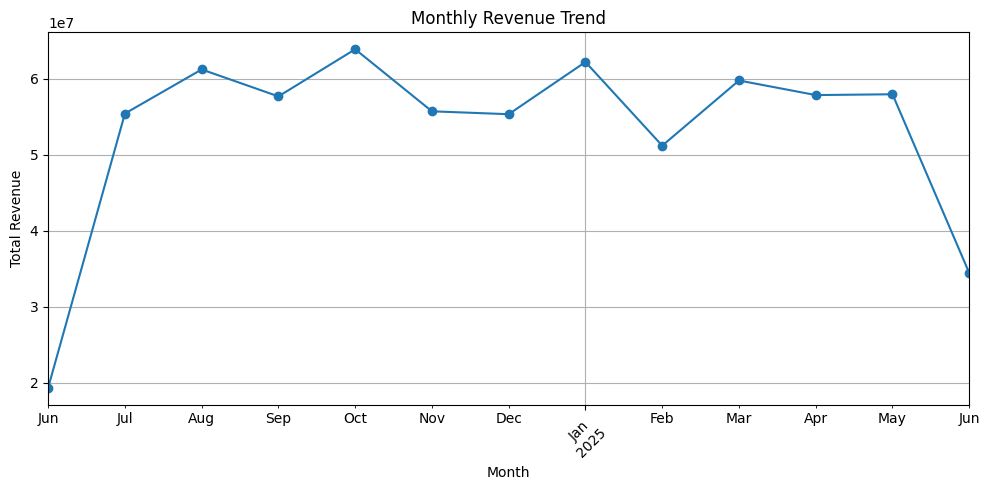

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("retail_sales_data.csv")

# Show basic info
print("Shape of dataset:", df.shape)
print("\nColumn Data Types:\n", df.dtypes)

# Convert date column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Check for missing values
print("\nMissing Values:\n", df.isnull().sum())

# Descriptive statistics
print("\nSummary Stats:\n", df.describe())

# Revenue trend by month
df['Month'] = df['Date'].dt.to_period('M')
monthly_sales = df.groupby('Month')['Revenue'].sum()

plt.figure(figsize=(10, 5))
monthly_sales.plot(kind='line', marker='o')
plt.title("Monthly Revenue Trend")
plt.xlabel("Month")
plt.ylabel("Total Revenue")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


/tmp/ipython-input-6-718540449.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_sales.index, y=category_sales.values, palette="Set2")


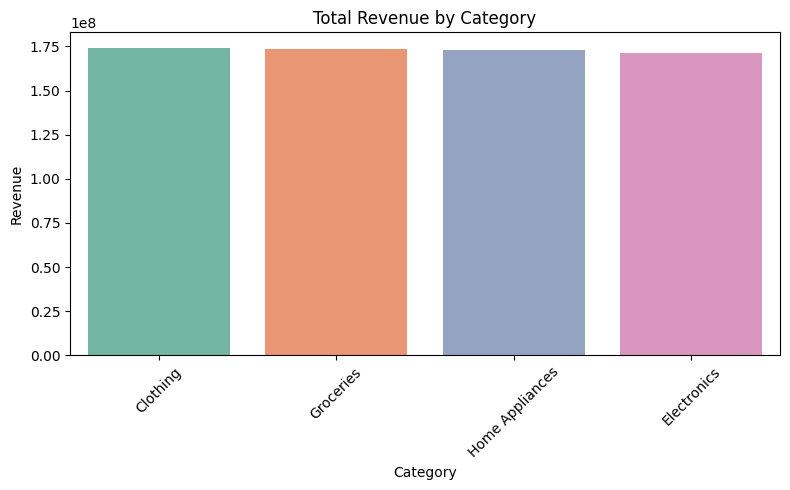

In [6]:
category_sales = df.groupby("Category")["Revenue"].sum().sort_values(ascending=False)

plt.figure(figsize=(8, 5))
sns.barplot(x=category_sales.index, y=category_sales.values, palette="Set2")
plt.title("Total Revenue by Category")
plt.ylabel("Revenue")
plt.xlabel("Category")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



/tmp/ipython-input-7-1443792602.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_units.index, y=region_units.values, palette="Set1")


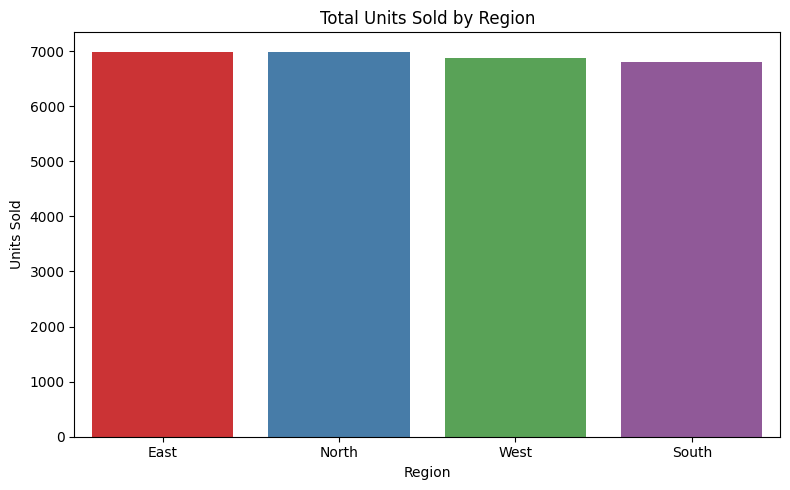

In [7]:
region_units = df.groupby("StoreRegion")["UnitsSold"].sum().sort_values(ascending=False)

plt.figure(figsize=(8, 5))
sns.barplot(x=region_units.index, y=region_units.values, palette="Set1")
plt.title("Total Units Sold by Region")
plt.ylabel("Units Sold")
plt.xlabel("Region")
plt.tight_layout()
plt.show()


/tmp/ipython-input-8-40458842.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products.values, y=top_products.index, palette="coolwarm")


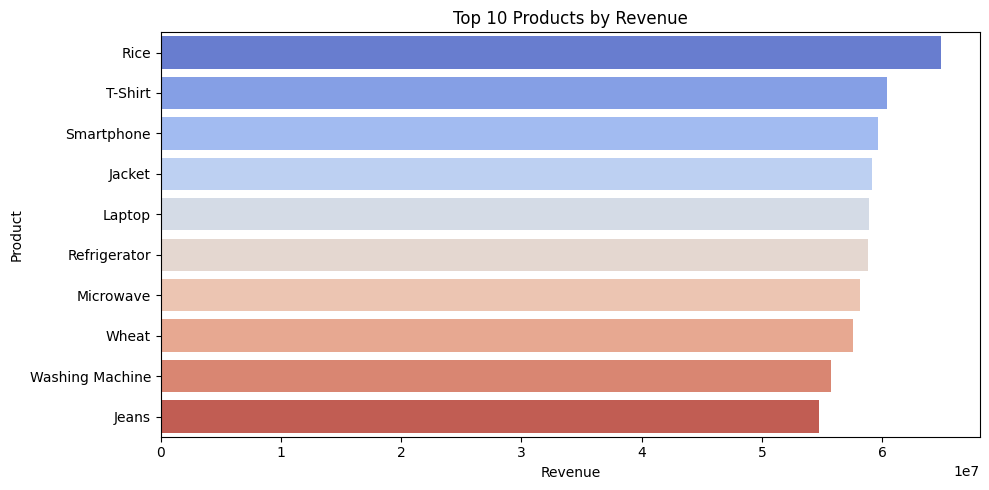

In [8]:
top_products = df.groupby("Product")["Revenue"].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 5))
sns.barplot(x=top_products.values, y=top_products.index, palette="coolwarm")
plt.title("Top 10 Products by Revenue")
plt.xlabel("Revenue")
plt.ylabel("Product")
plt.tight_layout()
plt.show()


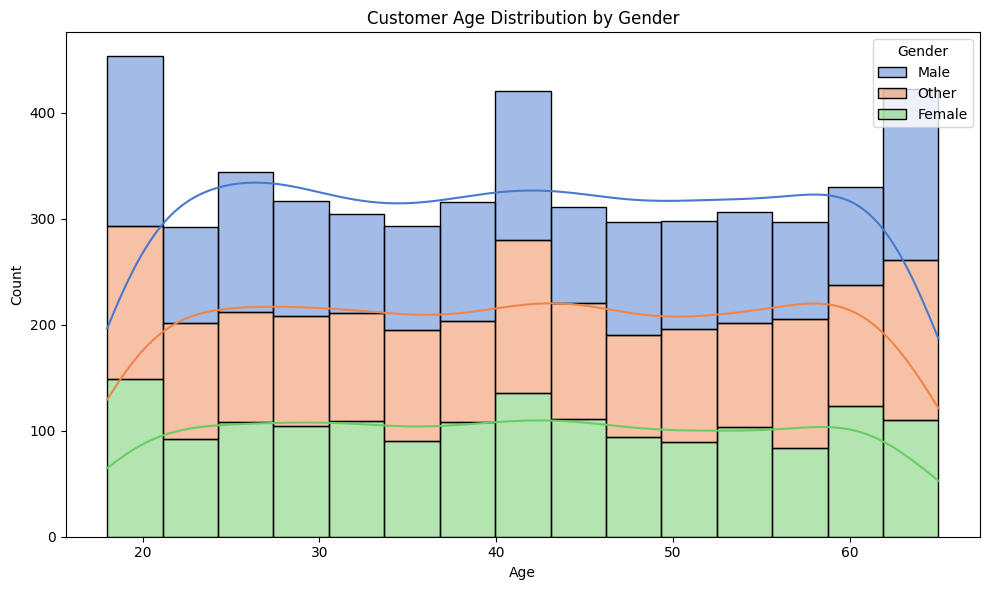

In [9]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x="CustomerAge", hue="Gender", bins=15, kde=True, palette="muted", multiple="stack")
plt.title("Customer Age Distribution by Gender")
plt.xlabel("Age")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


In [11]:
import sqlite3
import pandas as pd

# Reload dataset and clean any unsupported columns
df = pd.read_csv("retail_sales_data.csv")

# Drop 'Month' column if exists (was created during EDA)
if 'Month' in df.columns:
    df = df.drop(columns=['Month'])

# Save clean Date format
df['Date'] = pd.to_datetime(df['Date'])

# Connect to SQLite in-memory DB
conn = sqlite3.connect(":memory:")

# Store DataFrame in SQL
df.to_sql("sales", conn, index=False, if_exists='replace')

# ----------- RUN ALL 7 QUERIES ------------

# 1. Total Revenue
print("1. Total Revenue")
display(pd.read_sql_query("SELECT SUM(Revenue) as TotalRevenue FROM sales", conn))

# 2. Top 5 Stores by Revenue
print("\n2. Top 5 Stores by Revenue")
display(pd.read_sql_query("""
SELECT StoreID, SUM(Revenue) as StoreRevenue
FROM sales
GROUP BY StoreID
ORDER BY StoreRevenue DESC
LIMIT 5
""", conn))

# 3. Monthly Revenue
print("\n3. Monthly Revenue")
display(pd.read_sql_query("""
SELECT strftime('%Y-%m', Date) as Month, SUM(Revenue) as MonthlyRevenue
FROM sales
GROUP BY Month
ORDER BY Month
""", conn))

# 4. Most Popular Product (by Units Sold)
print("\n4. Most Popular Product")
display(pd.read_sql_query("""
SELECT Product, SUM(UnitsSold) as TotalUnits
FROM sales
GROUP BY Product
ORDER BY TotalUnits DESC
LIMIT 1
""", conn))

# 5. Revenue by Category
print("\n5. Revenue by Category")
display(pd.read_sql_query("""
SELECT Category, SUM(Revenue) as TotalRevenue
FROM sales
GROUP BY Category
ORDER BY TotalRevenue DESC
""", conn))

# 6. Region-wise Revenue
print("\n6. Region-wise Revenue")
display(pd.read_sql_query("""
SELECT StoreRegion, SUM(Revenue) as RegionRevenue
FROM sales
GROUP BY StoreRegion
ORDER BY RegionRevenue DESC
""", conn))

# 7. Customer Count by Gender
print("\n7. Customer Count by Gender")
display(pd.read_sql_query("""
SELECT Gender, COUNT(*) as CustomerCount
FROM sales
GROUP BY Gender
""", conn))


1. Total Revenue


,TotalRevenue
0,6.918688e+08



2. Top 5 Stores by Revenue


,StoreID,StoreRevenue
0,STR016,39751867.51
1,STR020,38883057.00
2,STR015,38337865.83
3,STR013,36113933.96
4,STR005,35875962.06



3. Monthly Revenue


,Month,MonthlyRevenue
0,2024-06,19336929.15
1,2024-07,55409527.82
2,2024-08,61210844.72
3,2024-09,57668008.66
4,2024-10,63868851.45
5,2024-11,55704304.75
6,2024-12,55323130.50
7,2025-01,62192495.50
8,2025-02,51181218.67
9,2025-03,59759400.73



4. Most Popular Product


,Product,TotalUnits
0,Rice,2549



5. Revenue by Category


,Category,TotalRevenue
0,Clothing,1.742660e+08
1,Groceries,1.737582e+08
2,Home Appliances,1.727431e+08
3,Electronics,1.711015e+08



6. Region-wise Revenue


,StoreRegion,RegionRevenue
0,East,1.758801e+08
1,North,1.757357e+08
2,West,1.713447e+08
3,South,1.689083e+08



7. Customer Count by Gender


,Gender,CustomerCount
0,Female,1610
1,Male,1685
2,Other,1705
